<a href="https://colab.research.google.com/github/Kevin2558/Data_Science/blob/main/Tarea_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import kagglehub

# Downoad latest version
path1 = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path1)

Path to dataset files: /root/.cache/kagglehub/datasets/elikplim/eergy-efficiency-dataset/versions/1


In [14]:
import kagglehub

# Downoad latest version
path2 = kagglehub.dataset_download("uciml/human-activity-recognition-with-smartphones")

print("Path to dataset files:", path2)

Path to dataset files: /root/.cache/kagglehub/datasets/elikplim/eergy-efficiency-dataset/versions/1


In [30]:
import kagglehub

# Download latest version
path3 = kagglehub.dataset_download("ruthgn/wine-quality-data-set-red-white-wine")

print("Path to dataset files:", path3)

100%|██████████| 98.0k/98.0k [00:00<00:00, 33.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/elikplim/eergy-efficiency-dataset/versions/1


In [34]:
import kagglehub

# Download latest version
path4 = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path4)

Path to dataset files: /kaggle/input/creditcardfraud


In [17]:
import kagglehub

# Download latest version
path5 = kagglehub.dataset_download("elikplim/eergy-efficiency-dataset")

print("Path to dataset files:", path5)

Path to dataset files: /root/.cache/kagglehub/datasets/elikplim/eergy-efficiency-dataset/versions/1


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [65]:
df1 = pd.read_csv(path1 + '/fashion-mnist_train.csv')
df1.shape

(60000, 785)

In [66]:
# Procedemos a eliminar la primera columna del dataset, ya que esta corresponde
# a una codificacion para saber el tipo de vestimenta

df1 = df1.drop(columns=['label'])

In [159]:
# Ahora, normalizamos nuestros datos para comenzar el proceso de PCA

scaler = StandardScaler()
X_scaled_1 = scaler.fit_transform(df1)

(60000, 784)

In [162]:
# Ahora aplicaremos PCA, conservando el 95% de la varianza

pca = PCA(n_components=0.95)
X_pca_1 = pca.fit_transform(X_scaled_1)

In [163]:
X_pca_1.shape

# Notemos que la dimensionalidad bajó a 256, aún conservando el 95% de la
# varianza

(60000, 256)

In [164]:
components_1 = pca.components_

In [165]:
components_1

array([[ 0.00031395,  0.00088127,  0.00149325, ...,  0.0064913 ,
         0.0014661 ,  0.0006676 ],
       [ 0.00017932,  0.0014502 ,  0.00115874, ...,  0.0140834 ,
         0.00961568,  0.00409087],
       [ 0.00011493,  0.00085995,  0.00188652, ...,  0.00893996,
        -0.00232472, -0.00124449],
       ...,
       [-0.02489535,  0.04248402, -0.00491171, ..., -0.01958045,
         0.05528764, -0.05775233],
       [-0.00171487, -0.01212216,  0.02063736, ...,  0.01992995,
         0.04327893,  0.01432107],
       [-0.01670649,  0.02860561, -0.05222822, ..., -0.03128197,
         0.04455644, -0.00301969]])

In [166]:
explained_variance_1 = pca.explained_variance_ratio_

In [167]:
explained_variance_1

array([0.22057176, 0.14395563, 0.05458802, 0.05116399, 0.04069273,
       0.03012154, 0.02750481, 0.02325871, 0.01694438, 0.01309833,
       0.01161488, 0.00963108, 0.00890642, 0.00856623, 0.00743049,
       0.00730157, 0.00657498, 0.00632692, 0.00623657, 0.0058046 ,
       0.00515707, 0.00511548, 0.00472764, 0.00453557, 0.00438423,
       0.00416784, 0.00395056, 0.00393244, 0.00378355, 0.00374478,
       0.00368528, 0.00353646, 0.00336422, 0.00330015, 0.00329434,
       0.00319736, 0.00305999, 0.00293714, 0.00289203, 0.00280918,
       0.00271998, 0.00265986, 0.00255732, 0.00253773, 0.00245191,
       0.00243254, 0.0023872 , 0.00228126, 0.00223339, 0.00215709,
       0.00212645, 0.00209085, 0.0020228 , 0.00201541, 0.00199305,
       0.00195332, 0.00191017, 0.00185777, 0.00181596, 0.00178264,
       0.00175763, 0.00173528, 0.00170987, 0.00167605, 0.00161354,
       0.00157432, 0.00154656, 0.00150991, 0.00148749, 0.00146464,
       0.00144441, 0.00143189, 0.00142557, 0.00140266, 0.00137

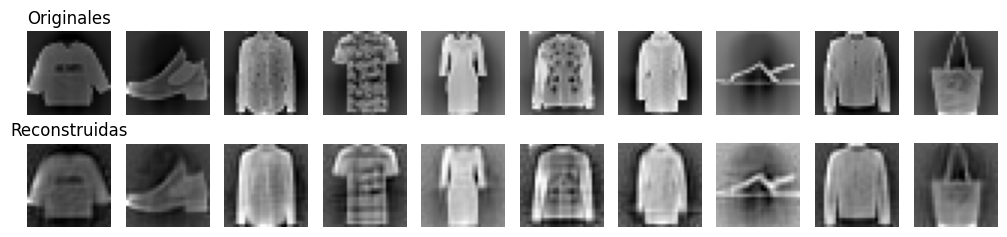

In [169]:
# Devolvamos la transformacion para poder visualizar si la informacion de las
# imagenes sigue siendo reconocible

X_reconstructed_1 = pca.inverse_transform(X_pca_1)

fig, axes = plt.subplots(2, 10, figsize=(10, 2.5))
for i in range(10):
    axes[0, i].imshow(X_scaled_1[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(X_reconstructed_1[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("Originales")
axes[1, 0].set_title("Reconstruidas")
plt.tight_layout()
plt.show()

In [41]:
import numpy as np

In [108]:
df2 = pd.read_csv(path2 + '/train.csv')

In [109]:
# Eliminamos la ultima columna que era del tipo object

df2 = df2.drop(columns=['Activity'])
df2.shape

(7352, 562)

In [170]:
# Procedemos a normalizar los datos para aplicar PCA

scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(df2)

# Al no darle un numero de componentes lo hará hasta 562 componentes que es la
# dimensionalidad

pca = PCA()
X_pca_2 = pca.fit_transform(X_scaled_2)

varianza_2 = pca.explained_variance_ratio_

In [171]:
import seaborn as sns

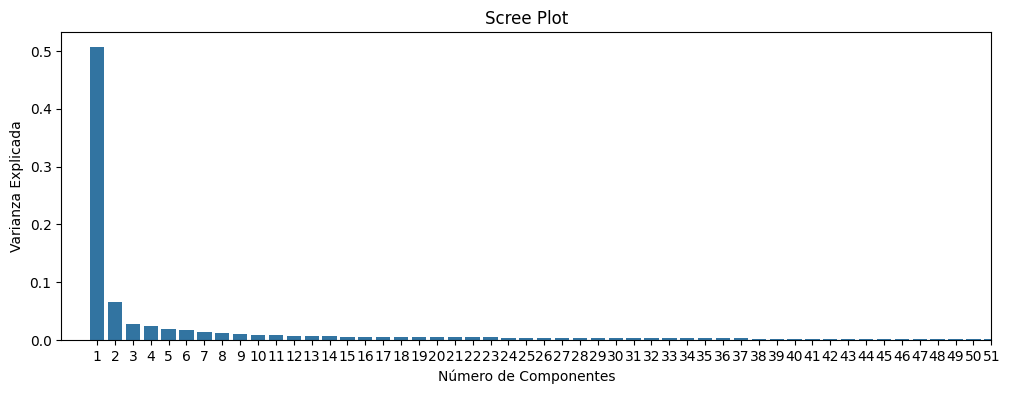

In [172]:
# Scree plot: Haremos un gráfico de barras el cual nos muestre cuanta varianza
# posee cada variable, esto nos ayudara a decidir el numero de componentes para
# realizar un PCA

x = np.arange(1, len(varianza_2) + 1)

plt.figure(figsize=(12, 4))
sns.barplot(x=x,y=varianza_2)
plt.xlim(-2,50)
plt.title('Scree Plot')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada')
plt.grid(False)
plt.show()

In [173]:
# Por otro lado, podemos realizar un ICA con 10 componentes, este metodo
# priorizará la independencia de las variables y no se concentrará en retener la
# mayor cantidad de varianza.

from sklearn.decomposition import FastICA

ica = FastICA(n_components=10, random_state=42)
X_ica_2 = ica.fit_transform(X_scaled_2)

X_ica_2.shape

(7352, 10)

In [31]:
df3 = pd.read_csv(path3 + '/wine-quality-white-and-red.csv')
df3.shape

(6497, 13)

In [36]:
df4 = pd.read_csv(path4 + '/creditcard.csv')
df4.shape

(284807, 31)

In [142]:
df5 = pd.read_csv(path5 + '/ENB2012_data.csv')

# Eliminaremos las ultimas dos columnas de respuesta

df5 = df5.drop(columns=['Y1', 'Y2'])

In [186]:
# Normalizamos nuestros datos para aplicar PCA

X_scaled_5 = scaler.fit_transform(df5)

pca = PCA(n_components=2)
X_pca_5 = pca.fit_transform(X_scaled_5)

varianza_5 = pca.explained_variance_ratio_

In [187]:
sum(varianza_5)

# Notemos que la varianza explicada acumulada no es mayor o igual a 0.9, sino
# que solo retiene el 62% de los datos, lo cual podria ser considerado una
# desventaja

np.float64(0.6178488249883751)

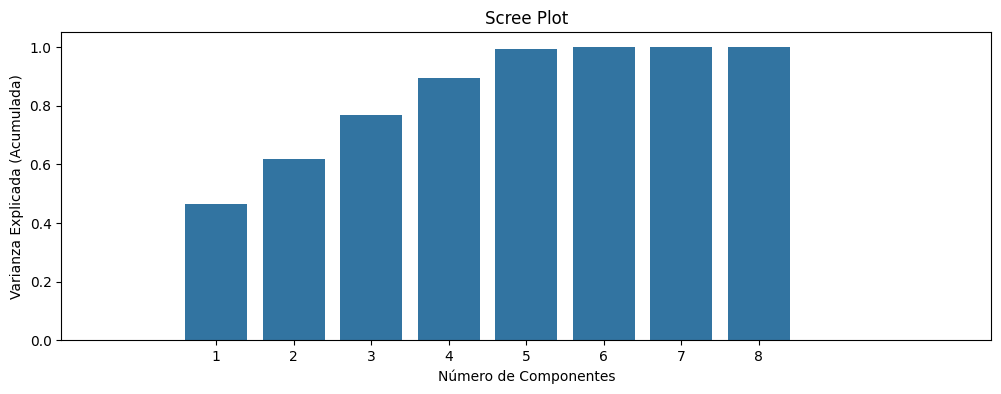

In [190]:
# Veamos un Scree Plot para ver cuantas componentes son necesarias para obtener
# una varianza explicada acumulada mayor a 90%

pca = PCA()
X_pca_acum = pca.fit_transform(X_scaled_5)

varianza_acum = pca.explained_variance_ratio_

x = np.arange(1, len(varianza_acum) + 1)

# Scree plot
plt.figure(figsize=(12, 4))
sns.barplot(x=x,y=np.cumsum(varianza_acum))
plt.xlim(-2,10)
plt.title('Scree Plot')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada (Acumulada)')
plt.grid(False)
plt.show()

In [191]:
pca = PCA(n_components=0.9)
X_pca_90 = pca.fit_transform(X_scaled_5)

X_pca_90.shape

# Como podemos notar, hacen falta 5 componentes para obtener una varianza
# explicada acumulada mayor a 90% por lo que en este caso no resulta una gran
# ventaja aplicar PCA con pocas componentes.

(768, 5)